Model of a generalized Josephson Junction Qubit

Authors: Cliff Sun, Harshvardhan, Alexey Bezryadin

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [13]:
def generate_random_numbers(n):
    random_numbers = [random.random() for _ in range(n)]
    return random_numbers

# Example: Generate 5 random numbers
n = 200
random_numbers = np.sort(generate_random_numbers(n))

In [14]:
# arrayOfJunctions = [0, 0.2, 0.8, 1] # Where the junctions are located; must be even amount of junctions (includes 0 and 1)
arrayOfJunctions = random_numbers

In [15]:
criticalCurrents = np.ones(int(len(arrayOfJunctions) / 2)) # all the critical currents for each junction (Critical Currents are assumed to be 1 by default)

prints out the elements in the junction in a better format

In [16]:
index = 0
while (index < (len(arrayOfJunctions) - 1)):
    if (index == len(arrayOfJunctions) - 2):
        print(str(arrayOfJunctions[index]) + " - " + str(arrayOfJunctions[index + 1]), end = " ")
    else:
        print(str(arrayOfJunctions[index]) + " - " + str(arrayOfJunctions[index + 1]) + ",", end = " ")
    index += 2

0.001986953125273083 - 0.00408295614632781, 0.005104468245560323 - 0.01198068020964993, 0.013930648014296887 - 0.030221629003200245, 0.030919801005652614 - 0.032078880261783294, 0.033363716564397405 - 0.03388055350097785, 0.0407988465899517 - 0.05848980109582591, 0.06750867952339912 - 0.0727689275674045, 0.07411361517165937 - 0.09151974681048658, 0.09802155243757604 - 0.10421458611082857, 0.10960834800346209 - 0.11119809459157759, 0.11579839133517567 - 0.11930723004382993, 0.11939778650982702 - 0.12283952973328638, 0.12981605361407134 - 0.14483473169775796, 0.1454591117900168 - 0.15109584500341233, 0.15150354516923914 - 0.17096871550545956, 0.17185033014193418 - 0.1746406609275385, 0.1760682784793155 - 0.17751025520700403, 0.18573134506010314 - 0.18699544015521607, 0.18878033585822063 - 0.1966985284513333, 0.20066273736081108 - 0.21003454616730455, 0.2108091225942037 - 0.2166939441651723, 0.21950223703587568 - 0.22172108774304156, 0.22454672354740457 - 0.22748444579177518, 0.2311878912

Parameters for Current -> Magnetic Field, Junction Locations, Critical Currents, Initial Phase Difference

B is the integer value of flux quanta present in the SQUID

In [17]:
def current(B, arrJ, arrC, y, numOfSegments): # y is initial phase difference of the whole circuit, B is the magnetic field, arrJ is the location of junctions, arrC is critical current associated with each junction
    curr = 0 # summation of all currents in the entire junction
    limit = int(len(arrJ) / 2) # number of junctions in the SQUID
    for n in range(limit):
        sizeOfSegment = float((arrJ[2 * n + 1] - arrJ[2 * n]) / numOfSegments)
        for i in range(numOfSegments):
            curr += arrC[n] * np.sin(y + (2 * np.pi * B) * (arrJ[2 * n] + i * sizeOfSegment)) * (1/numOfSegments)

    # phase difference evolves according to 2 * pi * B

    # curr += (critical current element in array)(sin(y + (2 * pi * B) * length)
    return curr

In [18]:
def maxCurrent(B, arrayJ, arrayC, numOfSegments): # Spits out the maximum current by varying the gauge invariant phase of the left end (free parameter) gamma
    Y=np.linspace(0, 2*np.pi, 150)
    dummyArray=[]
    for gamma in Y:
        dummyArray.append(current(B, arrayJ, arrayC, gamma, numOfSegments))
    return max(dummyArray)

In [19]:
MagField = np.linspace(-20, 20, 10000) # an array of Magnetic Fields ranging from 0 to 100 with 5000 total elements

The 2 lines below is where the useful section of the code is for modeling a SQUID

In [20]:
IMaxPoint = []

In [21]:
numOfSegments = 3

In [22]:
for B in MagField:
    IMaxPoint.append(maxCurrent(B, arrayOfJunctions, criticalCurrents, numOfSegments) / int(len(arrayOfJunctions) / 2)) # This integer represents the number of segments you want to cut each junction up into (the higher the number, the better the approximation)

The 2 lines above is where the useful section of the code is for modeling a SQUID

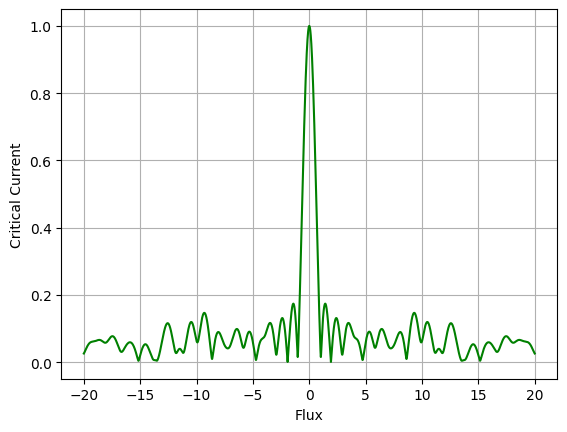

In [25]:
plt.plot(MagField, IMaxPoint, 'g-')
plt.xlabel('B')
plt.ylabel('Critical Current')  
plt.grid()            
plt.show()

In [33]:
diff = []

for n in range(int(len(IMaxPoint)/2)):
    diff.append(np.abs(IMaxPoint[int(len(MagField)/2)-n] - IMaxPoint[int(len(MagField)/2)+n]))

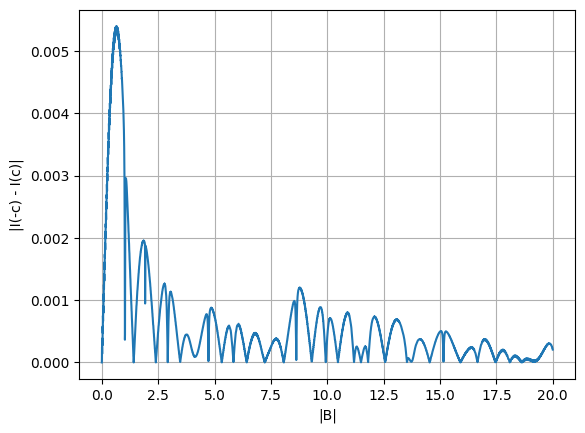

In [34]:
plt.plot(MagField[int(len(MagField)/2):], diff)
plt.xlabel('|B|')
plt.ylabel('|I(-c) - I(c)|')
plt.grid()
plt.show()